In [135]:
import pandas as pd
import numpy as np
import cv2
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline


In [136]:
! git clone https://github.com/rodolfoSara/face_recognition.git

fatal: destination path 'face_recognition' already exists and is not an empty directory.


In [137]:
img = cv2.imread('/content/face_recognition/test_images/sharapova1.jpg')

In [138]:
img.shape

(555, 700, 3)

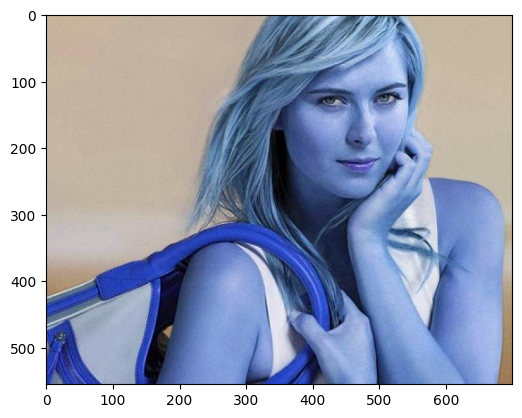

In [139]:
plt.imshow(img)

In [140]:
img

array([[[200, 179, 157],
        [200, 179, 157],
        [200, 179, 157],
        ...,
        [195, 181, 158],
        [194, 180, 157],
        [193, 179, 156]],

       [[200, 179, 157],
        [200, 179, 157],
        [200, 179, 157],
        ...,
        [196, 182, 159],
        [194, 180, 157],
        [193, 179, 156]],

       [[200, 179, 157],
        [200, 179, 157],
        [200, 179, 157],
        ...,
        [196, 182, 159],
        [195, 181, 158],
        [193, 179, 156]],

       ...,

       [[ 26,  58, 158],
        [ 30,  59, 163],
        [ 33,  59, 165],
        ...,
        [154, 120,  84],
        [154, 120,  84],
        [154, 120,  84]],

       [[ 30,  62, 162],
        [ 32,  61, 165],
        [ 35,  61, 167],
        ...,
        [154, 120,  84],
        [154, 120,  84],
        [154, 120,  84]],

       [[ 35,  67, 167],
        [ 34,  63, 167],
        [ 36,  62, 168],
        ...,
        [153, 119,  83],
        [153, 119,  83],
        [153, 119,  83]]

In [141]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray.shape

(555, 700)

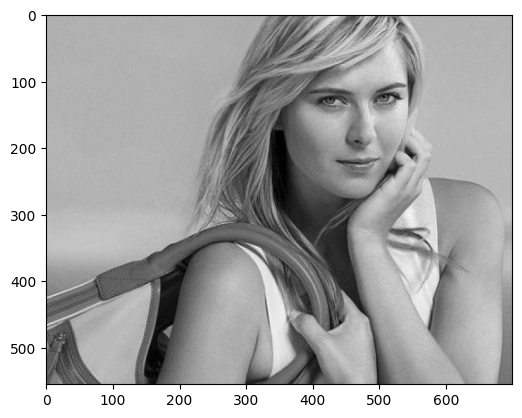

In [142]:
plt.imshow(gray, cmap='gray')

In [143]:
face_cascade = cv2.CascadeClassifier('/content/face_recognition/haarcascades/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('/content/face_recognition/haarcascades/haarcascade_eye.xml')



In [144]:
faces =face_cascade.detectMultiScale(gray, 1.3,5)
faces

array([[352,  38, 233, 233]], dtype=int32)

array es x, y weight height, x 352 es donde empieza el rostro en x, y 38 donde empieza el rostro en y


In [145]:
faces

array([[352,  38, 233, 233]], dtype=int32)

In [146]:
(x,y,w,h) = faces[0]

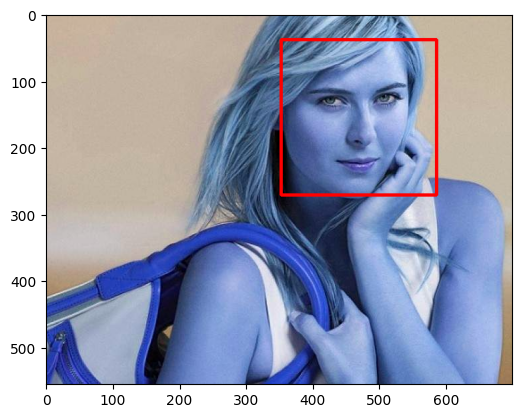

In [147]:
face_img = cv2.rectangle(img,(x,y),(x+w, y+h),(255,0,0),4)
plt.imshow(face_img)

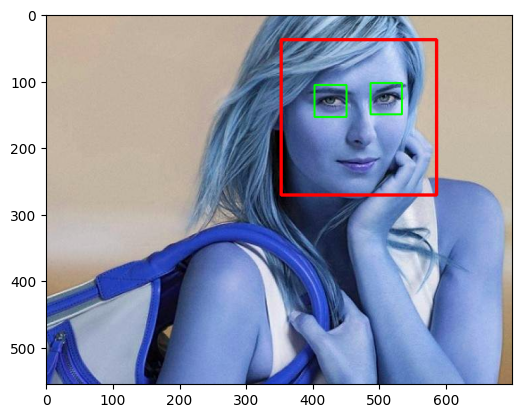

In [148]:
cv2.destroyAllWindows()
for (x,y,w,h) in faces:
  face_img = cv2.rectangle(img,(x,y),(x+w, y+h),(255,0,0),4)
  roi_gray = gray[y:y+h, x:x+w]
  roi_color = face_img[y:y+h, x:x+w]
  eyes = eye_cascade.detectMultiScale(roi_gray)
  for (ex, ey, ew, eh) in eyes:
    cv2.rectangle(roi_color, (ex, ey), (ex+ew, ey+eh),(0,255,0),2)

plt.figure()
plt.imshow(face_img, cmap='gray')
plt.show()


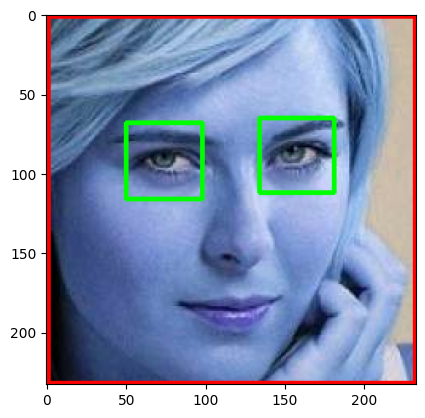

In [149]:
plt.imshow(roi_color, cmap='gray')

In [150]:
def get_cropped_image_if_2_eyes(image_path):
  img = cv2.imread(image_path)
  gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  faces = face_cascade.detectMultiScale(gray, 1.3,5)
  for (x,y,w,h) in faces:
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    if len(eyes) >=2:
      return roi_color

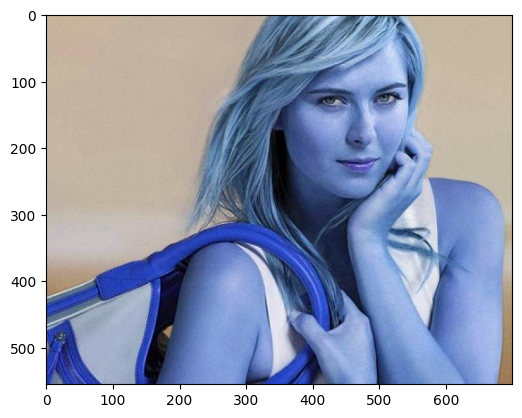

In [151]:
original_image = cv2.imread('/content/face_recognition/test_images/sharapova1.jpg')
plt.imshow(original_image)

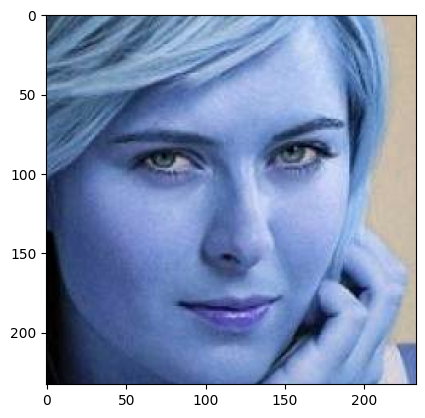

In [152]:
cropped_image = get_cropped_image_if_2_eyes('/content/face_recognition/test_images/sharapova1.jpg')
plt.imshow(cropped_image)

In [153]:
cropped_image

array([[[ 84, 105, 126],
        [ 66,  86, 104],
        [ 50,  69,  90],
        ...,
        [199, 185, 162],
        [199, 185, 162],
        [199, 185, 162]],

       [[ 73,  93, 111],
        [ 53,  73,  91],
        [ 41,  60,  81],
        ...,
        [199, 185, 162],
        [199, 185, 162],
        [198, 184, 161]],

       [[ 68,  88, 106],
        [ 52,  69,  88],
        [ 45,  64,  85],
        ...,
        [200, 186, 163],
        [200, 186, 163],
        [201, 187, 164]],

       ...,

       [[ 10,   6,  11],
        [  5,   2,   4],
        [  0,   0,   1],
        ...,
        [109, 128, 185],
        [102, 123, 184],
        [105, 127, 193]],

       [[  9,   5,  10],
        [  4,   1,   3],
        [  0,   0,   1],
        ...,
        [110, 130, 185],
        [102, 123, 184],
        [106, 128, 194]],

       [[  8,   4,   9],
        [  2,   0,   1],
        [  0,   0,   1],
        ...,
        [112, 132, 187],
        [101, 122, 183],
        [105, 127, 193]]

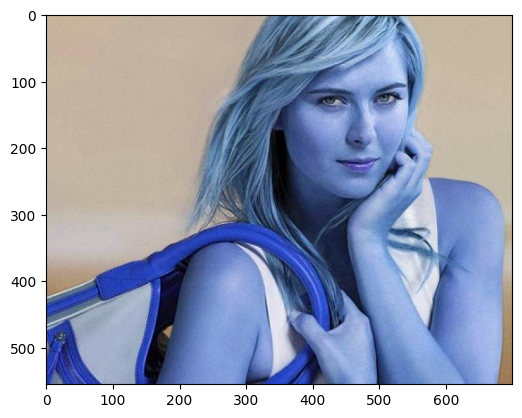

In [154]:
original_image = cv2.imread('/content/face_recognition/test_images/sharapova1.jpg')
plt.imshow(original_image)

In [155]:
#pruebo con una imagen q no tiene ojo, no entre un array como la foto anterior
no_eyes = get_cropped_image_if_2_eyes('/content/face_recognition/test_images/sharapova2.JPG')
no_eyes

In [156]:
path_data = '/content/face_recognition/dataset/'
path_crop_data = '/content/face_recognition/cropped/'

In [157]:
import os
img_dirs = []
for entry in os.scandir(path_data):
  if entry.is_dir():
    img_dirs.append(entry.path)

In [158]:
img_dirs

['/content/face_recognition/dataset/roger_federer',
 '/content/face_recognition/dataset/virat_kohli',
 '/content/face_recognition/dataset/lionel_messi',
 '/content/face_recognition/dataset/maria_sharapova',
 '/content/face_recognition/dataset/serena_williams']

In [159]:
# borro el cropped folder si existe y creo uno nuevo
import shutil
if os.path.exists(path_crop_data):
  shutil.rmtree(path_crop_data)
os.mkdir(path_crop_data)

In [160]:
cropped_image_dirs = []
celebrity_file_names_dict = {}
for img_dir in img_dirs:
    count = 1
    #separo los nombres
    celebrity_name = img_dir.split('/')[-1]
    celebrity_file_names_dict[celebrity_name] = []
    for entry in os.scandir(img_dir):
        #llamo a la funcion de arriba cropped eyes
        roi_color = get_cropped_image_if_2_eyes(entry.path)
        #si en la foto se ven los ojos
        if roi_color is not None:
            cropped_folder = path_crop_data + celebrity_name
            #si la carpeta cropped no existe, la creo
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_image_dirs.append(cropped_folder)
                print("Generating cropped images in folder: ",cropped_folder)
            #count: messi1, messi2, etc
            cropped_file_name = celebrity_name + str(count) + ".png"
            cropped_file_path = cropped_folder + "/" + cropped_file_name
            cv2.imwrite(cropped_file_path, roi_color)
            celebrity_file_names_dict[celebrity_name].append(cropped_file_path)
            count += 1

Generating cropped images in folder:  /content/face_recognition/cropped/roger_federer
Generating cropped images in folder:  /content/face_recognition/cropped/virat_kohli
Generating cropped images in folder:  /content/face_recognition/cropped/lionel_messi
Generating cropped images in folder:  /content/face_recognition/cropped/maria_sharapova
Generating cropped images in folder:  /content/face_recognition/cropped/serena_williams


borrar las imagenes en la carpeta cropped q no son de los personajes, hay fotos que el personaje esta con otra persona

In [161]:
import numpy as np
import pywt
import cv2

In [162]:
#wavedec2 sacamos las caracteristicas principales de la cara
def w2d(img, mode='haar', level=1):
  imArray = img
  #img a gris
  imArray = cv2.cvtColor(imArray, cv2.COLOR_RGB2GRAY)
  #img a float
  imArray = np.float32(imArray)
  imArray /= 255
  #compute coefficients
  coeffs = pywt.wavedec2(imArray, mode, level=level)

  #process coefficients
  coeffs_h= list(coeffs)
  coeffs_h[0]*=0

  #reconstruction
  imArray_H = pywt.waverec2(coeffs_h, mode)
  imArray_H*= 255
  imArray_H = np.uint(imArray_H)

  return imArray_H


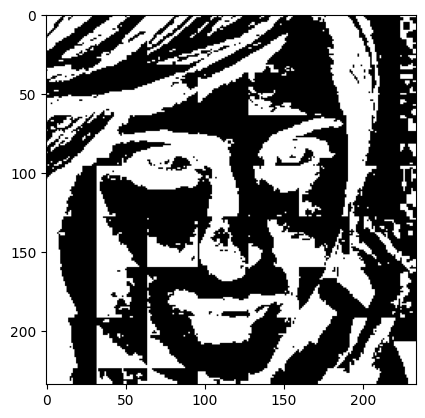

In [163]:
im_harrrrrr = w2d(cropped_image, 'db1',5)
plt.imshow(im_harrrrrr, cmap='gray')

In [164]:
celebrity_file_names_dict

{'roger_federer': ['/content/face_recognition/cropped/roger_federer/roger_federer1.png',
  '/content/face_recognition/cropped/roger_federer/roger_federer2.png',
  '/content/face_recognition/cropped/roger_federer/roger_federer3.png',
  '/content/face_recognition/cropped/roger_federer/roger_federer4.png',
  '/content/face_recognition/cropped/roger_federer/roger_federer5.png',
  '/content/face_recognition/cropped/roger_federer/roger_federer6.png',
  '/content/face_recognition/cropped/roger_federer/roger_federer7.png',
  '/content/face_recognition/cropped/roger_federer/roger_federer8.png',
  '/content/face_recognition/cropped/roger_federer/roger_federer9.png',
  '/content/face_recognition/cropped/roger_federer/roger_federer10.png',
  '/content/face_recognition/cropped/roger_federer/roger_federer11.png',
  '/content/face_recognition/cropped/roger_federer/roger_federer12.png',
  '/content/face_recognition/cropped/roger_federer/roger_federer13.png',
  '/content/face_recognition/cropped/roger_

In [165]:
class_dict = {}
count = 0
for celebrity_name in celebrity_file_names_dict.keys():
  class_dict[celebrity_name] = count
  count +=1
class_dict

{'roger_federer': 0,
 'virat_kohli': 1,
 'lionel_messi': 2,
 'maria_sharapova': 3,
 'serena_williams': 4}

In [166]:
for celebrity_name, training_files in celebrity_file_names_dict.items():
  for training_image in training_files:
    img = cv2.imread(training_image)
    img = cv2.resize(img, (32,32))
    img_har = w2d(img,'db1',5)


In [167]:
X = []
y = []

for celebrity_name, training_files in celebrity_file_names_dict.items():
  for training_image in training_files:
    img = cv2.imread(training_image)
    #si no encuentra la foto q continue
    if img is None:
      continue
    scalled_raw_img = cv2.resize(img, (32,32))
    img_har = w2d(img, 'db1', 5)
    #astype(float) tuve q ponerlo porq daba error sino
    scalled_img_har = cv2.resize(img_har.astype(float), (32,32))
    #pasamos a 1 sola dimension
    combined_img = np.vstack((scalled_raw_img.reshape(32*32*3,1), scalled_img_har.reshape(32*32,1)))
    X.append(combined_img)
    y.append(class_dict[celebrity_name])


In [168]:
#combined_img
32*32*3 + 32*32

4096

In [169]:
len(X[0])

4096

In [170]:
len(X)

187

In [171]:
X = np.array(X).reshape(len(X), 4096).astype(float)
X.shape

(187, 4096)

In [172]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [173]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC(kernel = 'rbf', C = 10))])
pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)

0.7659574468085106

In [174]:
print(classification_report(y_test, pipe.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      0.86      0.92         7
           1       0.80      0.67      0.73        12
           2       0.80      0.80      0.80        10
           3       1.00      0.67      0.80         9
           4       0.53      0.89      0.67         9

    accuracy                           0.77        47
   macro avg       0.83      0.78      0.78        47
weighted avg       0.82      0.77      0.77        47



In [175]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

In [179]:
#paramentros para el grid

model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto',probability=True),
        'params' : {
            'svc__C': [1,10,100,1000],
            'svc__kernel': ['rbf','linear']
        }
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'randomforestclassifier__n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'logisticregression__C': [1,5,10]
        }
    }
}

In [177]:
import pandas as pd

In [180]:
scores = []
best_estimators = {}

for algo, mp in model_params.items():
    pipe = make_pipeline(StandardScaler(), mp['model'])
    clf =  GridSearchCV(pipe, mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train, y_train)
    scores.append({
        'model': algo,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    best_estimators[algo] = clf.best_estimator_

df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df


,model,best_score,best_params
0,svm,0.721429,"{'svc__C': 1, 'svc__kernel': 'linear'}"
1,random_forest,0.564286,{'randomforestclassifier__n_estimators': 5}
2,logistic_regression,0.742857,{'logisticregression__C': 1}


In [181]:
best_estimators

{'svm': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('svc',
                  SVC(C=1, gamma='auto', kernel='linear', probability=True))]),
 'random_forest': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('randomforestclassifier',
                  RandomForestClassifier(n_estimators=5))]),
 'logistic_regression': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('logisticregression',
                  LogisticRegression(C=1, solver='liblinear'))])}

In [182]:
best_estimators['svm']

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc',
                 SVC(C=1, gamma='auto', kernel='linear', probability=True))])

In [184]:
best_estimators['svm'].score(X_test, y_test)

0.7872340425531915

In [185]:
best_estimators['random_forest'].score(X_test, y_test)

0.6382978723404256

In [188]:
best_estimators['logistic_regression'].score(X_test, y_test)

0.8297872340425532

In [190]:
from sklearn.metrics import confusion_matrix

In [192]:
best_clf = best_estimators['logistic_regression']

In [193]:
cm = confusion_matrix(y_test, best_clf.predict(X_test))
cm

array([[6, 1, 0, 0, 0],
       [0, 9, 1, 0, 2],
       [0, 0, 9, 0, 1],
       [0, 0, 0, 8, 1],
       [0, 0, 0, 2, 7]])

In [194]:
import seaborn as sn

Text(95.72222222222221, 0.5, 'Truth')

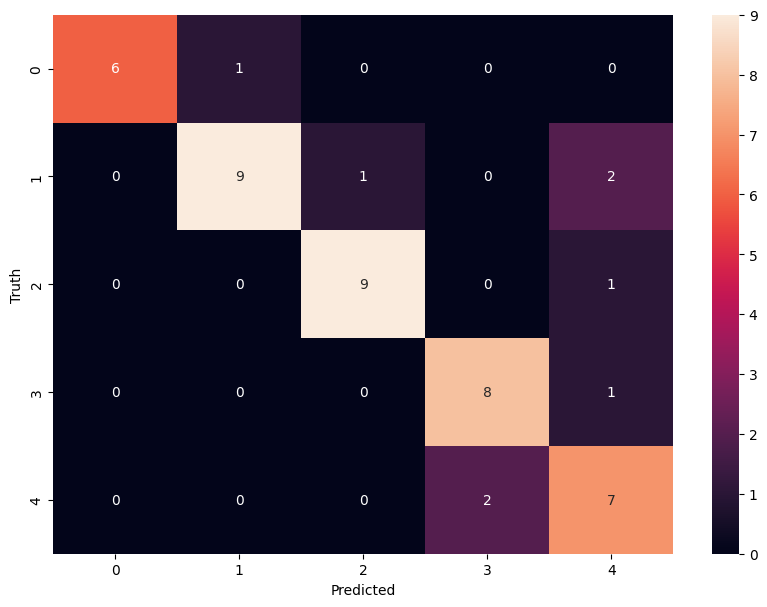

In [195]:
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [196]:
class_dict

{'roger_federer': 0,
 'virat_kohli': 1,
 'lionel_messi': 2,
 'maria_sharapova': 3,
 'serena_williams': 4}

In [198]:
import joblib


In [199]:
#save model como pickle
joblib.dump(best_clf, 'saved_model.pkl')

['saved_model.pkl']

In [200]:
import json
with open('class_dictionary.json', 'w') as f:
  f.write(json.dumps(class_dict))